In [13]:
# Imports
from PIL import Image
import numpy as np
import cv2
import math
from scipy.fft import dct
import matplotlib.pyplot as plt
import os

## Compressing one 8x8 block

In [2]:
#convert image to grey scale
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [3]:
#getting an 8x8 block
init_x=50
init_y=100
block = np.array(im[init_x:init_x+8, init_y:init_y+8], dtype=float)-128

In [4]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [5]:
#define c function used in DCT
def c_funct(i):
    if i==0:
        return 1/(2**(1/2))
    else:
        return 1

def dct_matrix():
    result_matrix = np.zeros(shape=(8,8))
    sum = 0
    for i in range(8):
        for j in range(8):
            if i ==0:
                result_matrix[i,j] = np.sqrt(1/8)
            else:
                result_matrix[i,j] = np.sqrt(2/8)*math.cos(((2*j+1)*i*math.pi)/16)
    return result_matrix
    
def dct_funct(block):
    return np.matrix(dct_matrix()) * np.matrix(block) * np.matrix(dct_matrix().transpose())

def idct_funct(block):
    return np.matrix(dct_matrix().transpose()) * np.matrix(block) * np.matrix(dct_matrix())

def round(block_val, q_mat_val):
    return np.round(block_val/q_mat_val)
    if block_val>0:
        return np.floor((block_val+np.floor(q_mat_val/2))/q_mat_val)
    else:
        return np.floor((block_val-np.floor(q_mat_val/2))/q_mat_val)

def quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = round(block[i,j], q_mat[i,j])
    
    return result_mat

def inv_quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = block[i,j]*q_mat[i,j]
    return result_mat

In [6]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [7]:
block

array([[   5.,  -57.,  -37.,  -55.,  -32.,   82.,   39.,   47.],
       [ -21.,  -49.,  -52.,  -74.,  -33.,   88.,   49.,   79.],
       [ -29.,  -43.,  -58.,  -48., -103.,   34.,   90.,   70.],
       [ -33.,  -36.,  -45.,  -45.,  -77., -105.,   45.,   76.],
       [ -54.,  -44.,  -45.,  -71.,  -49.,  -75., -109.,   68.],
       [ -44.,  -42.,  -40.,  -52.,  -40.,   31.,  -62.,  -89.],
       [ -34.,  -25.,  -42.,  -74.,  -40.,   -8.,   -5.,  -46.],
       [ -29.,  -40.,  -53.,  -55.,  -37.,   -2.,  -22.,  -14.]])

In [8]:
np.round(np.matrix(dct_matrix())*np.matrix(dct_matrix().transpose()),2)

array([[ 1.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  1.,  0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0.,  1.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  1.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  1.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0.,  1.]])

In [9]:
np.matrix(np.round(dct_funct(block), 0))

matrix([[-196., -171.,  138.,   28.,  -37.,   -3.,   54.,  -30.],
        [ 111., -122.,   80.,    6.,   -9.,   35.,   25.,  -17.],
        [  65.,  -21.,  -36.,  108.,  -47.,   12.,   33.,   -8.],
        [ -32.,   61.,  -75.,   40.,    6.,  -48.,   52.,   -1.],
        [ -18.,   15.,   29.,  -70.,   74.,  -23.,   -6.,   23.],
        [  11.,   10.,   19.,   -8.,  -26.,   57.,  -51.,   23.],
        [   0.,    9.,  -28.,   31.,  -28.,   36.,   11.,  -31.],
        [  -8.,   -9.,   22.,  -18.,   11.,  -20.,   17.,  -11.]])

In [10]:
#quantization of block
quant_block = quantization(np.round(dct_funct(block)), quant_mat)


In [11]:
quant_block

array([[-12., -16.,  14.,   2.,  -2.,  -0.,   1.,  -0.],
       [  9., -10.,   6.,   0.,  -0.,   1.,   0.,  -0.],
       [  5.,  -2.,  -2.,   4.,  -1.,   0.,   0.,  -0.],
       [ -2.,   4.,  -3.,   1.,   0.,  -1.,   1.,  -0.],
       [ -1.,   1.,   1.,  -1.,   1.,  -0.,  -0.,   0.],
       [  0.,   0.,   0.,  -0.,  -0.,   1.,  -0.,   0.],
       [  0.,   0.,  -0.,   0.,  -0.,   0.,   0.,  -0.],
       [ -0.,  -0.,   0.,  -0.,   0.,  -0.,   0.,  -0.]])

In [12]:
#inverse quantization
inv_quant_block = inv_quantization(quant_block, quant_mat)


In [13]:
inv_dct = idct_funct(inv_quant_block)

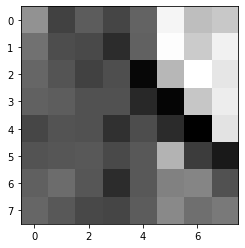

In [14]:
plt.imshow(block,cmap='gray')

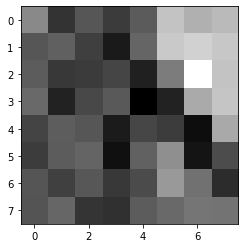

In [15]:
plt.imshow(inv_dct, cmap='gray')

## Compressing the entire image

In [16]:
# compressing the entire image
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_cropped = np.matrix(im[0:224, 0:224], dtype=float)-128

In [17]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

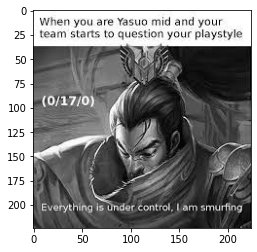

In [18]:
plt.imshow(image_cropped, cmap='gray')

In [19]:
result = np.zeros(shape=(224,224))
for i in range(int(224/8)):
    for j in range(int(224/8)):
        block = image_cropped[i*8:(i+1)*8, j*8:(j+1)*8]
        dct = np.round(dct_funct(block),0)
        quant = np.round(quantization(dct, quant_mat))
        iquant = inv_quantization(quant, quant_mat)
        idct = idct_funct(iquant)
        result[i*8:(i+1)*8, j*8:(j+1)*8] = idct

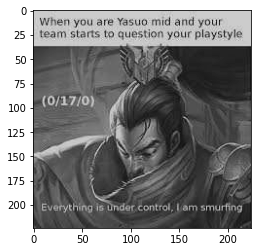

In [20]:
plt.imshow(result, cmap='gray')

## Designing new quantizer

In [10]:
# get image file names
image_file_path = 'data/org/'
files = [f for f in os.listdir(image_file_path)]
files.remove('.DS_Store')
training_set = np.array([])
files = files[:20]

NameError: name 'os' is not defined

In [22]:
# functions for creating and storing DCT of 8x8 blocks

def import_image(file_path):
    im = cv2.imread(image_file_path + file_path)
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#cuts images into 8x8 blocks and applies dct, returns array of 8x8 matricies
def blockify(image):
    len_rounded = int(image.shape[0]/8)
    width_rounded = int(image.shape[1]/8)
    return_array = np.zeros(shape=(len_rounded*8, width_rounded*8))

    for i in range(len_rounded):
        for j in range(width_rounded):
            image_block = np.array(image[i*8:(i+1)*8, j*8:(j+1)*8], dtype=float) #decide whether to subtract 128
            return_array[i*8:(i+1)*8, j*8:(j+1)*8] = dct_funct(image_block)
    return return_array

def generate_training(dct_block):
    return_arr = []
    len_rounded = int(dct_block.shape[0]/8)
    width_rounded = int(dct_block.shape[1]/8)
    for i in range(len_rounded):
        for j in range(width_rounded):
            return_arr.append(dct_block[i*8:(i+1)*8, j*8:(j+1)*8])
    return return_arr
    
def quantization(dct_block):
    pass

def reconstruct(quantized_block):
    len_rounded = int(quantized_block.shape[0]/8)
    width_rounded = int(quantized_block.shape[1]/8)
    recon_image = np.zeros(shape=(len_rounded*8, width_rounded*8))
    for i in range(len_rounded):
        for j in range(width_rounded):
            recon_image[8*i:8*(i+1), 8*j:8*(j+1)] = idct_funct(quantized_block[8*i:8*(i+1), 8*j:8*(j+1)])
    return recon_image


In [23]:
bit_al_mat = np.matrix([[6,4,3,1,0,0,0,0],
                        [3,2,2,0,0,0,0,0],
                        [1,1,1,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0],
                        ])

## Training quantizer with zero channel error

In [24]:
#for testing, using kmeans clustering algorithm (doesnt account for channel error)
from sklearn.cluster import KMeans
mat_len = bit_al_mat.shape[0]
mat_width = bit_al_mat.shape[1]
quantizer_array = []
for i in range(mat_len):
    for j in range(mat_width):
        if bit_al_mat[i,j]!=0:
            print(bit_al_mat[i,j], 2**bit_al_mat[i,j], (i,j))
            quantizer_array.append([KMeans(n_clusters=2**bit_al_mat[i,j]), (i,j)])

# TODO: create a function that takes in matrix and automatically creates quantizers for each element in matrix

6 64 (0, 0)
4 16 (0, 1)
3 8 (0, 2)
1 2 (0, 3)
3 8 (1, 0)
2 4 (1, 1)
2 4 (1, 2)
1 2 (2, 0)
1 2 (2, 1)
1 2 (2, 2)


In [25]:
training_set = []
count = 0
for image_path in files:
    print(count)
    count =count+1
    blocks = blockify(import_image(image_path))
    training_set = training_set + generate_training(blocks)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
# training quantizers
count = 0
for element in quantizer_array:
    print(count)
    count =count + 1
    bit_location = element[1]
    element[0].fit(np.array(training_set)[:,bit_location[0],bit_location[1]].reshape(-1,1))

0
1
2
3
4
5
6
7
8
9


## Testing quantizer with zero channel error

In [27]:
image = cv2.imread(image_file_path+ files[4])
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_dct_blocks = blockify(image)

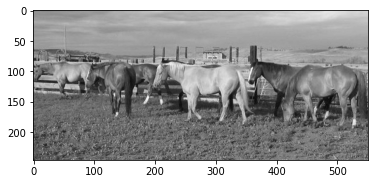

In [28]:
#before compression
plt.imshow(image, cmap='gray')

In [29]:
quantizer_array[0][0].predict([[2]])

array([35], dtype=int32)

In [30]:
return_block_array = []
length = int(image.shape[0]/8)
width = int(image.shape[1]/8)
quantized_output = np.zeros(shape=(length*8, width*8))
for i in range(length):
    for j in range(width):
        block = image_dct_blocks[i*8: (i+1)*8, j*8: (j+1)*8]
        quantized_block = np.zeros(shape=(8,8))
        for element in quantizer_array:
            location = element[1]
            centroid_locations = element[0].cluster_centers_
            pixel_val = block[location]
            centroid_num = element[0].predict([[pixel_val]])[0]
            quantized_block[location] = centroid_locations[centroid_num].copy()
        quantized_output[i*8: (i+1)*8, j*8: (j+1)*8] = quantized_block



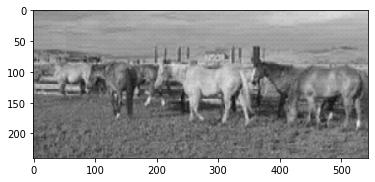

In [31]:
plt.imshow(reconstruct(quantized_output), cmap='gray')

## Channel optimized quantizer

Implementing quantizer that is channel optimized for a memoryless channel

In [32]:
#importing channel optimized channel
cluster = KMeans(2)
cluster.fit(np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1))
cluster.cluster_centers_

array([[8.],
       [3.]])

In [8]:
from sklearn.cluster import KMeans
import numpy as np
from cosq_class import CoSQ
from image_quantizer import ImageQuantizer
import cv2

In [34]:
cluster = KMeans(4)
arr = [np.random.rand()*1000 for i in range(1000)]
cluster.fit(np.array(arr).reshape(-1,1))
cluster_c = CoSQ(0, 2)
cluster_c.training_set(arr)
cluster_c.c_fit()
print('2 different quantized values:',cluster_c.quantize(43), cluster.cluster_centers_[cluster.predict([[12]])][0][0])
print(cluster.cluster_centers_)
print(cluster_c.centroids)

4 1000
[346.29904 860.9336  112.16943 593.3479 ]
2 different quantized values: 2 114.23917943009951
[[601.39369808]
 [114.23917943]
 [862.29009475]
 [353.37316607]]
[346.29904 860.9336  112.16943 593.3479 ]


44012
0
64 44012
[1308.7681   1002.5549   1639.0275    245.70187   900.86237  2029.8214
 1347.0005    620.42676   447.0244   1410.7396    346.67996  1826.1266
 1852.7736     41.59     1561.8022   1964.9117    582.8019   1888.1041
  934.1734   1437.6306   1988.1625    423.50745   128.7907    282.1526
  840.7961   1035.2021   1134.5782    549.2596    812.59625  1459.7372
  724.43555  1202.685      89.285866  968.6462    469.52524   784.4616
 1938.5321    493.71402   399.68365   520.1813   1918.2521    375.43665
  315.12704   168.72873   755.58795  1381.3187   1722.0044   1067.3087
  691.87134  1269.2307   1233.8568   1168.3785    657.5453   1679.5671
 1506.0641   1760.426    1490.0083   1791.2286   1100.5704   1474.0641
  870.24286   206.3623   1599.7942   1528.2861  ]
1
16 44012
[ 141.70343   355.5543    582.32184  -203.7673    480.05255   420.84973
  660.7657    705.3817    625.4337    287.64066   541.63525   -29.48831
  601.9441     73.08242    12.348725  212.3705  ]
2
8 44012
[ 276.4

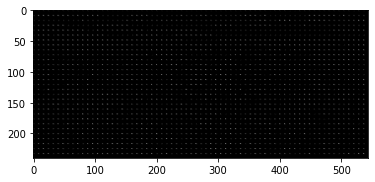

In [35]:
img_quant = ImageQuantizer(bit_al_mat=bit_al_mat, epsilon=0)
img_quant.import_training_set('data/org/')
img_quant.train()
image = cv2.imread(image_file_path+ files[4])
plt.imshow(img_quant.compress_image(image), cmap='gray')

## Sending an image through the channel

In [2]:
bit_al_mat_76 = np.array([
    [8,8,5,3,3,2,0,0],
    [6,5,3,3,2,1,0,0],
    [3,3,3,2,2,1,0,0],
    [2,2,2,2,1,0,0,0],
    [1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
])

bit_al_mat_58 = np.array([
    [8,7,4,3,2,1,0,0],
    [5,4,3,2,1,0,0,0],
    [3,3,2,2,1,0,0,0],
    [2,2,2,1,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0],
])

In [23]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting Histograms of dct distributions for each pixel

In [59]:
import seaborn as sns

In [26]:
img_quant = ImageQuantizer(bit_al_mat=bit_al_mat_58, epsilon=0.005)
img_quant.import_training_set('data/hires_photos/')

data/hires_photos/giraffe-to-1920x1200.png
data/hires_photos/315111872_3425110674440220_8955531567007150365_n.jpg
data/hires_photos/sid-balachandran-_9a-3NO5KJE-unsplash.jpg
data/hires_photos/mos-design-IBhdjlSbvuw-unsplash.jpg
data/hires_photos/mak-IqOCrPo2zf4-unsplash.jpg
data/hires_photos/hans-jurgen-mager-Fbdr6gXJBVY-unsplash.jpg
1122190


In [45]:
np.array(img_quant.training_set)[:,0,0]

array([1212.375, 1192.625, 1178.25 , ...,  844.25 ,  810.5  ,  925.875])

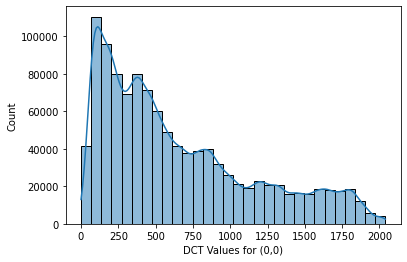

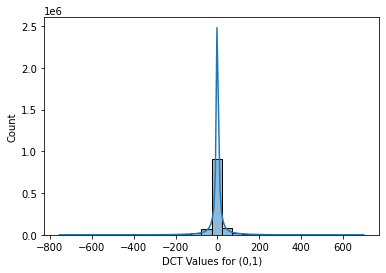

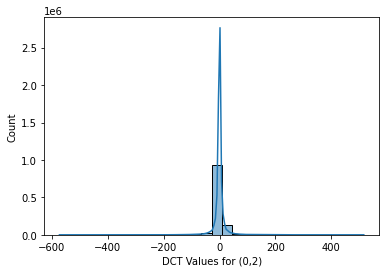

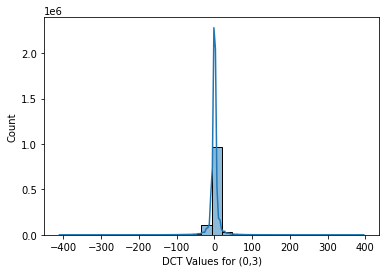

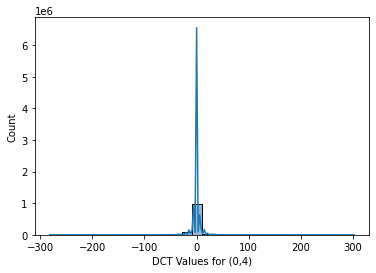

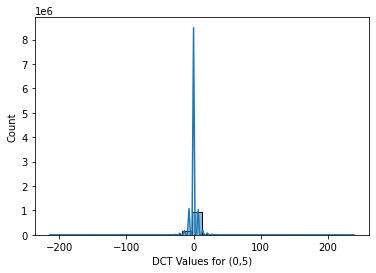

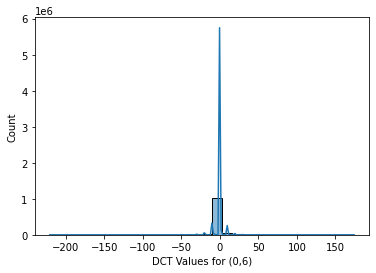

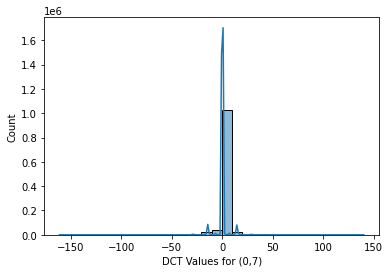

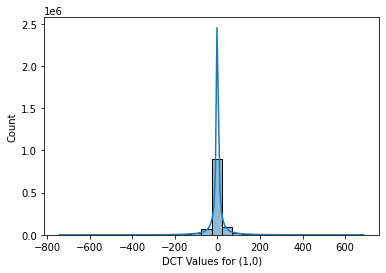

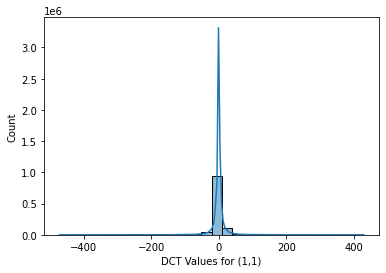

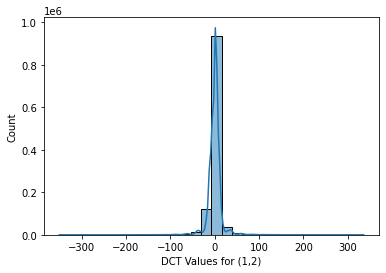

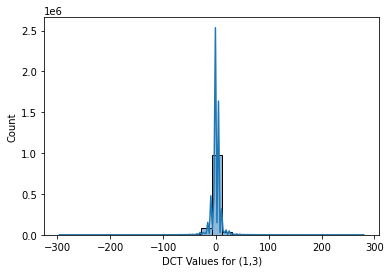

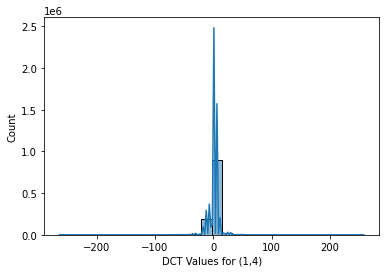

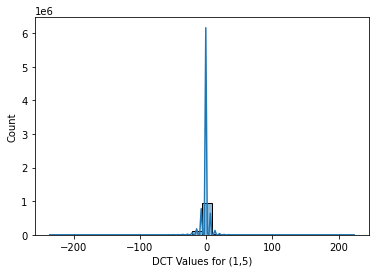

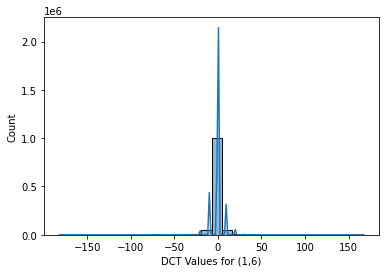

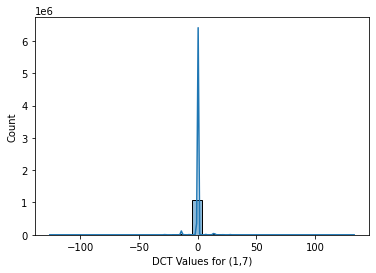

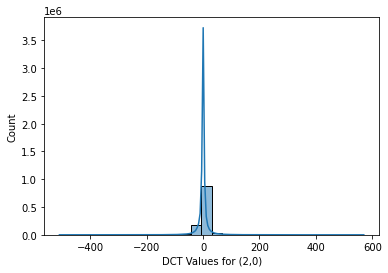

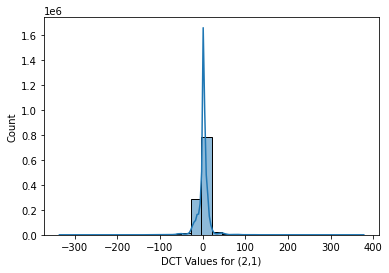

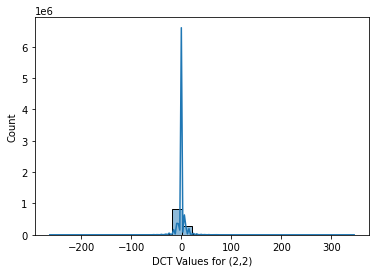

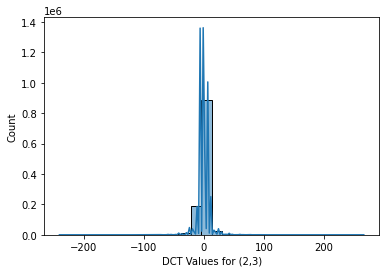

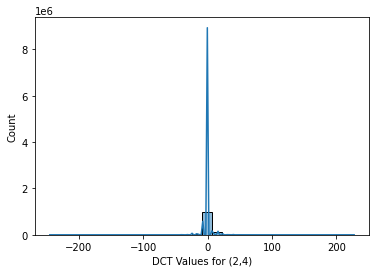

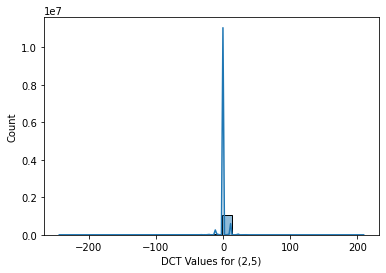

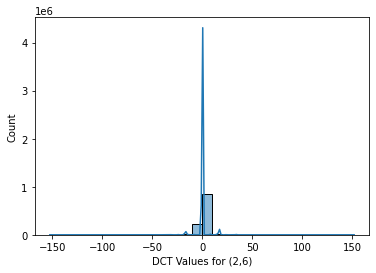

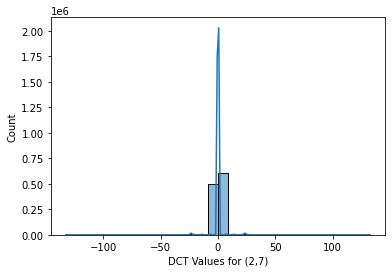

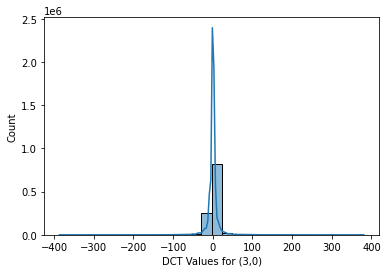

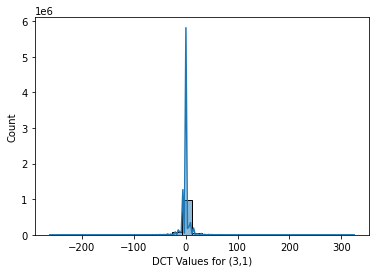

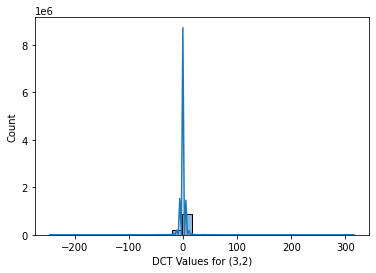

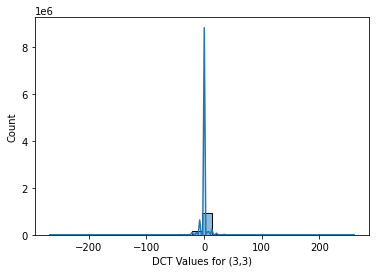

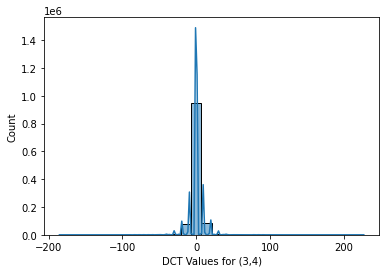

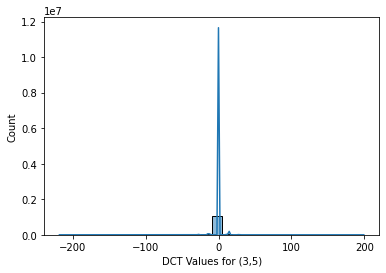

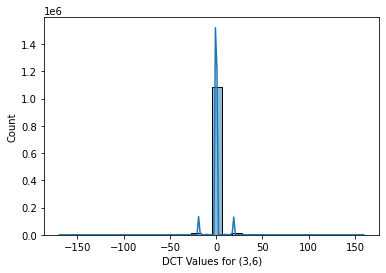

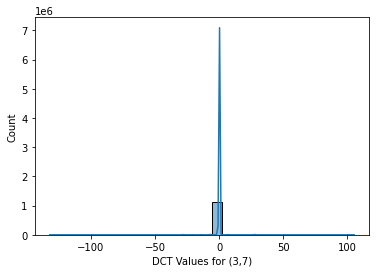

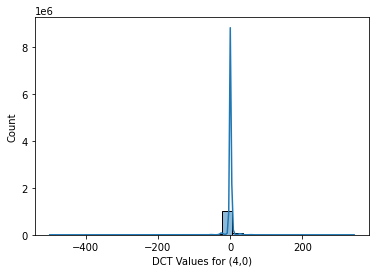

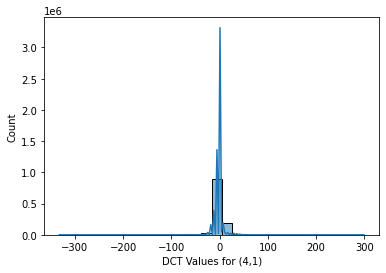

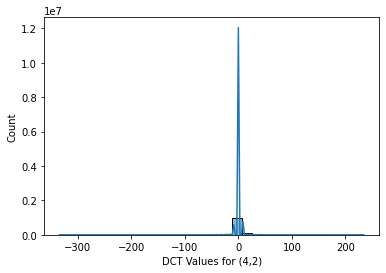

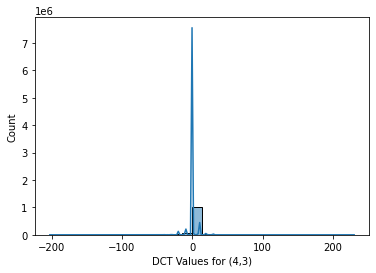

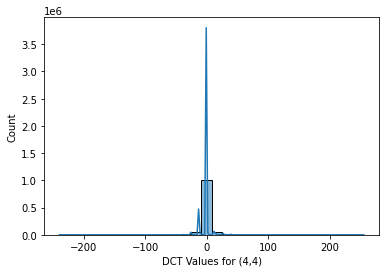

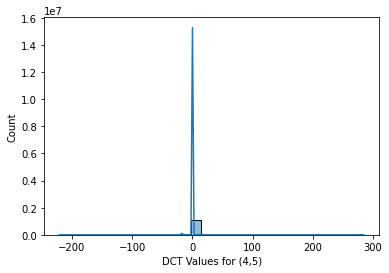

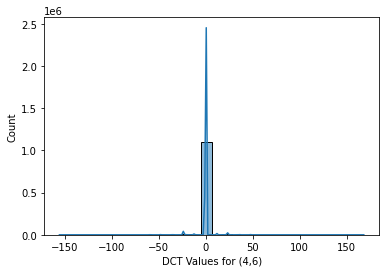

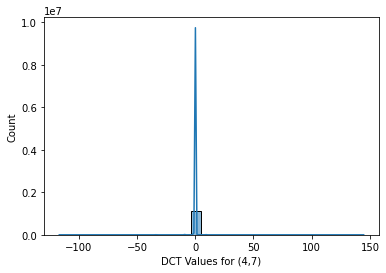

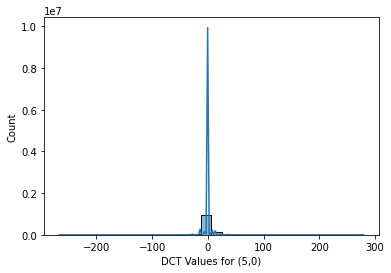

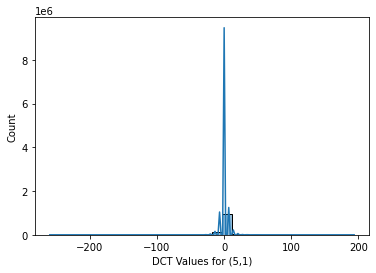

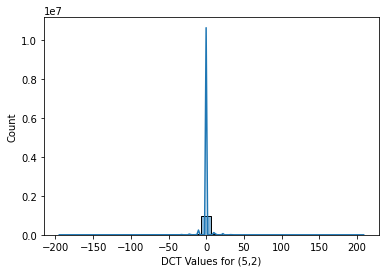

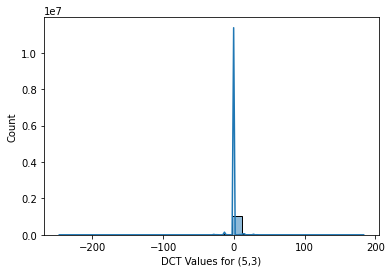

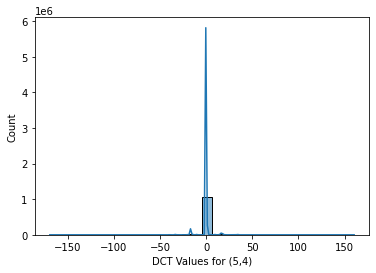

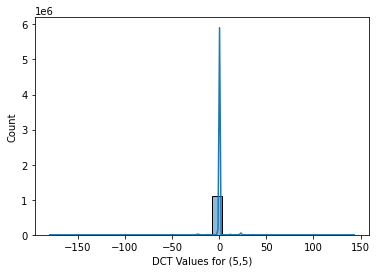

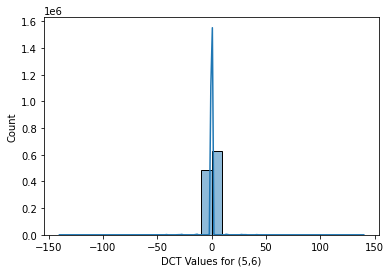

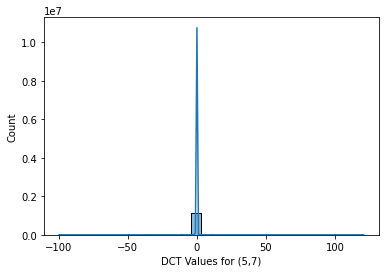

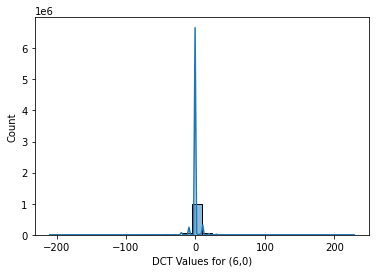

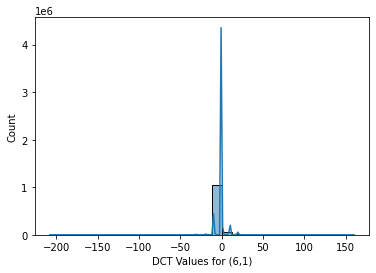

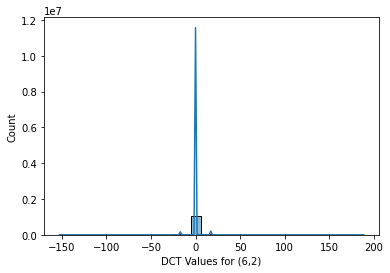

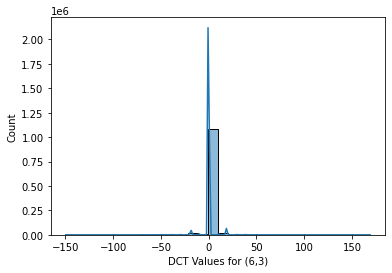

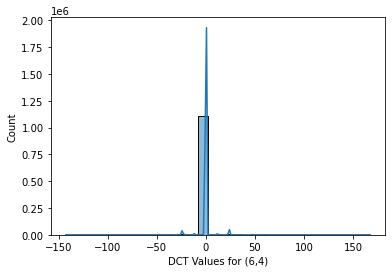

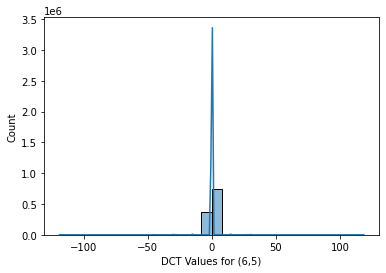

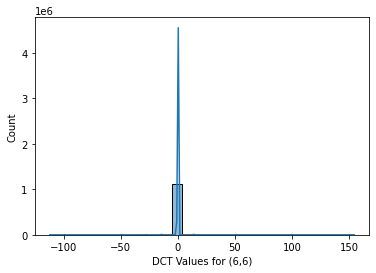

In [69]:
for i in range(8):
    for j in range(8):
        sns.histplot(np.array(img_quant.training_set)[:,i,j], kde=True,bins=30).set(xlabel='DCT Values for ({0},{1})'.format(i,j))
        plt.savefig('plots/dist{0}{1}.png'.format(i,j))
        plt.show()

In [58]:
np.mean(np.array(img_quant.training_set)[:,0,0])

645.8413735641915

## Comparing PSNR of JPEG and Scalar Quantization
* plotting PSNR
* plotting storage needed for each image